<a href="https://colab.research.google.com/github/AndreTeixeir/hackathon-one-sentiment-api/blob/main/Hackathon_One_Nb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>**Importação de Bibliotecas**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

!pip install nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report)

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# <font color='blue'>**Extração dos Dados**

In [8]:
url = "https://raw.githubusercontent.com/AndreTeixeir/hackathon-one-sentiment-api/refs/heads/main/datascience/dataset_sentimento_limpo.csv"
df = pd.read_csv(url, sep=',')
df.head()


,comentario,sentimento
0,filas de mais de horas nos brinquedosfilas de ...,0
1,parque lotado fila da montezum demorou mais de...,0
2,muito ruim caiu na qualidade muito demorado um...,0
3,o parque atende a diversas faixa etária fomos ...,1
4,decadentesó vá ao parque sea você poder perder...,0


# <font color='blue'>**Separação entre Treino e Teste**

In [9]:
X = df['comentario']
y = df['sentimento']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y )

# <font color='blue'>**Vetorização de Texto (TF-IDF)**

Transformação dos Textos com TF-IDF

In [11]:
stopwords_pt = stopwords.words('portuguese')

In [12]:
tfidf = TfidfVectorizer(
    max_features=1000,
    min_df=2,
    max_df=0.95,
    ngram_range=(1, 2),
    stop_words=stopwords_pt
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [13]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 90381 stored elements and shape (3235, 1000)>

In [14]:
tfidf.get_feature_names_out()[:20]

array(['abandonado', 'abandono', 'abertas', 'aberto', 'abertos',
       'abertura', 'abre', 'abrir', 'abriu', 'absurdamente', 'absurdo',
       'absurdos', 'abusivo', 'abusivos', 'acaba', 'acabou', 'acesso',
       'achei', 'acho', 'acidente'], dtype=object)

# <font color='blue'>**Treinamento do Modelo**

Treinamento do Modelo de Regressão Logística

In [15]:
#Criação do modelo
model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs')

In [16]:
#Treinamento do modelo
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [17]:
#Previsões no conjunto de teste
y_pred = model.predict(X_test_tfidf)
y_proba = model.predict_proba(X_test_tfidf)

# <font color='blue'>**Avaliação do Modelo**

Fazer predição e aplicar métricas de validação

In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Acurácia: 0.8504
Precisão: 0.8497
Recall: 0.8249
F1-score: 0.8371


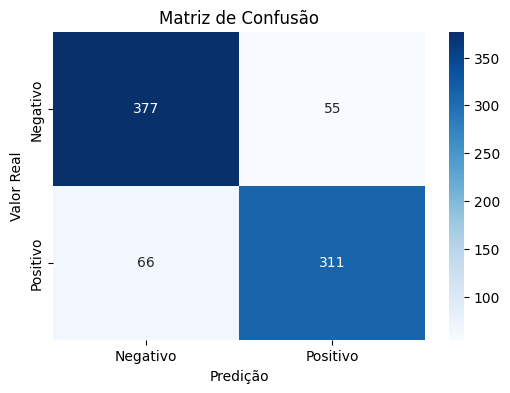

In [19]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Negativo', 'Positivo'],
    yticklabels=['Negativo', 'Positivo']
)

plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

In [20]:
print(classification_report(
    y_test,
    y_pred,
    target_names=['Negativo', 'Positivo']
))

              precision    recall  f1-score   support

    Negativo       0.85      0.87      0.86       432
    Positivo       0.85      0.82      0.84       377

    accuracy                           0.85       809
   macro avg       0.85      0.85      0.85       809
weighted avg       0.85      0.85      0.85       809



## <font color='red'>**Interpretação dos Resultados das Métricas de Avaliação do Modelo**

O modelo de Regressão Logística apresentou um desempenho consistente e equilibrado na tarefa de classificação de sentimentos, conforme indicado pelas métricas de avaliação obtidas.

**Desempenho Geral**

* Acurácia (85,04%): o modelo acertou aproximadamente 85% das previsões no conjunto de teste, indicando uma boa capacidade de generalização.

* F1-score (83,71%): o valor elevado do F1-score demonstra um equilíbrio satisfatório entre precisão e recall, sendo especialmente relevante em cenários onde erros de classificação possuem custos distintos.

**Análise das Métricas por Classe**

* Classe Negativa:

   * Precisão: 85%

   * Recall: 87%

   * F1-score: 86%

  >O modelo apresenta excelente capacidade de identificar corretamente avaliações negativas, com baixo índice de falsos negativos.

* Classe Positiva:

   * Precisão: 85%

   * Recall: 82%

   * F1-score: 84%

  > Observa-se um leve decréscimo no recall, indicando que parte das avaliações positivas foi classificada incorretamente como negativa.

**Balanceamento do Modelo**

* As médias macro e ponderada apresentam valores semelhantes (≈85%), o que indica:

    * Ausência de viés significativo em favor de uma classe específica.

    * Desempenho equilibrado, mesmo com uma leve diferença no número de exemplos entre classes.

**Interpretação dos Resultados**

* O modelo demonstra maior sensibilidade para a classe Negativa, o que pode ser considerado positivo em contextos de análise de sentimento voltados para:

   * Monitoramento de insatisfação de clientes.

   * Identificação precoce de problemas em produtos ou serviços.

* O desempenho geral sugere que a combinação de TF-IDF com Regressão Logística é adequada para a tarefa proposta, mesmo utilizando um modelo linear e relativamente simples.

**Conclusão**

Os resultados indicam que o modelo é robusto, interpretável e eficiente para a classificação binária de sentimentos em avaliações de usuários. Ele pode ser utilizado como uma solução viável para aplicações reais, como apoio à tomada de decisão em marketing, análise de reputação de produtos e monitoramento da experiência do cliente.

# <font color='blue'>**Serialização do Modelo**

Salvando o Modelo Treinado (Essencial para integração com o Back-End.)

In [21]:
"""
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

"""

'\njoblib.dump(model, "sentiment_model.pkl")\njoblib.dump(tfidf, "tfidf_vectorizer.pkl")\n\n'

# <font color='blue'>**Teste Manual de Predição**

Testar manualmente Modelo de Classifição treinado.